In [1]:
import os
import sys
import json
import argparse
from typing import *
from tqdm import *
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
try:
  from ..utils.logger import logger
  from ..utils.utils import *
except ImportError:
  from utils.logger import logger
  from utils.utils import *

In [3]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

def solve_P2():
  def PP2(x, d):
    return session.evaluate(wl.Evaluate(wlexpr(f'First[P2[{x}]-P2[{x-d}]]')))
  
  def find(start, stop, f, esp=2*1e-5, n=100):
    d = (stop - start) / n
    print(f"find({start}, {stop}, {d})")
    m = (start + stop) / 2
    v = f(m, d)
    if abs(v) < esp:
      return [m, v]
    if v < 0:
      return find(start, m, f)
    return find(m, stop, f)

  return find(0, 100000, PP2)

# solve_P2()

In [6]:
def find(start, stop, f, esp=2*1e-5, n=100):
  d = (stop - start) / n
  print(f"find({start}, {stop}, {d})")
  m = (start + stop) / 2
  v = f(m, d)
  if abs(v) < esp:
    return [m, v]
  if v < 0:
    return find(start, m, f)
  return find(m, stop, f)

find(0, 100000, PP2)

find(0, 100000, 1000.0)
find(0, 50000.0, 500.0)
find(25000.0, 50000.0, 250.0)
find(25000.0, 37500.0, 125.0)
find(31250.0, 37500.0, 62.5)
find(34375.0, 37500.0, 31.25)
find(34375.0, 35937.5, 15.625)
find(34375.0, 35156.25, 7.8125)
find(34375.0, 34765.625, 3.90625)
find(34375.0, 34570.3125, 1.953125)
find(34472.65625, 34570.3125, 0.9765625)
find(34472.65625, 34521.484375, 0.48828125)
find(34472.65625, 34497.0703125, 0.244140625)
find(34472.65625, 34484.86328125, 0.1220703125)
find(34472.65625, 34478.759765625, 0.06103515625)
find(34472.65625, 34475.7080078125, 0.030517578125)
find(34472.65625, 34474.18212890625, 0.0152587890625)
find(34472.65625, 34473.419189453125, 0.00762939453125)
find(34473.03771972656, 34473.419189453125, 0.003814697265625)
find(34473.228454589844, 34473.419189453125, 0.0019073486328125)
find(34473.228454589844, 34473.323822021484, 0.00095367431640625)
find(34473.276138305664, 34473.323822021484, 0.000476837158203125)
find(34473.299980163574, 34473.323822021484, 0.0

[34473.31529058477, 0.0]

In [3]:
'''
CalcP22[kStart_, kStop_, kStepNum_, eStart_, eStop_, eStepNum_] := 
  Table[{e, k, First[P22[k, e]]}, 
    {k, Range[kStart, kStop, (kStop-kStart)/kStepNum]}, 
    {e, Range[eStart, eStop, (eStop-eStart)/eStepNum]}]
DrawP22[data_] := ListPlot3D[Flatten[data, 1]]
'''

'\nCalcP22[kStart_, kStop_, kStepNum_, eStart_, eStop_, eStepNum_] := \n  Table[{e, k, First[P22[k, e]]}, \n    {k, Range[kStart, kStop, (kStop-kStart)/kStepNum]}, \n    {e, Range[eStart, eStop, (eStop-eStart)/eStepNum]}]\nDrawP22[data_] := ListPlot3D[Flatten[data, 1]]\n'

In [8]:
# session.evaluate(P22)

In [9]:
# session.evaluate(wlexpr("First[P22[10000, 0.6]]"))

In [10]:
# import nest_asyncio
# nest_asyncio.apply()
# import asyncio
# from wolframclient.evaluation import WolframLanguageSession
# from wolframclient.language import wl, wlexpr
# from wolframclient.evaluation import WolframEvaluatorPool
# from wolframclient.evaluation import parallel_evaluate
# # expressions = ['Pause[1]; $ProcessID' for _ in range(10)]
# expressions = [f'Print[{i}]; {i}' for i in range(10)]
# # expressions = ['$ProcessID' for _ in range(10)]
# # parallel_evaluate(expressions, max_evaluators=20)

# pool = WolframEvaluatorPool()
# async def test_pool():
#   return await asyncio.gather(*[pool.evaluate(f"{i}^2") for i in range(10)])

# async def test_pool_loop():
#   for i in range(4):
#     print(f"done {i}", await test_pool())
  
# # asyncio.run(test_pool_loop())
  

In [3]:
import math
import nest_asyncio
nest_asyncio.apply()
import random
import matplotlib.pyplot as plt
from wolframclient.language import wl, wlexpr
from wolframclient.evaluation import WolframLanguageSession
# from wolframclient.evaluation import parallel_evaluate
import asyncio
import time
import queue
import threading

P22 = """
start = 510; stop = 520; dim = 1;
M = 4866; m = 2433; k = 80000; c = 10000; omega = 2.2143; k1 = 1025 * 9.8 * Pi;
f = 4890; c0 = 167.8395; m0 = 1165.992;
cmv2[v_, ck_, ce_] := ck * Abs[v]^ce;
P22I[ck_, ce_] := NDSolve[{m*x2''[t]==k*(x1[t]-x2[t])+cmv2[x1'[t]-x2'[t], ck, ce]*(x1'[t]-x2'[t]), 
    f*Cos[omega * t]==k*(x1[t]-x2[t])+cmv2[x1'[t]-x2'[t], ck, ce]*(x1'[t]-x2'[t])+k1*x1[t]+c0*x1'[t]+m0*x1''[t]+M*x1''[t], 
    x1[0]==x2[0]==x1'[0]==x2'[0]==0},
  {x1, x2}, {t, start, stop}]
P22[ck_, ce_] := Sum[cmv2[x1'[i]-x2'[i], ck, ce+2] * dim, {i, start, stop, dim}] /. P22I[ck, ce]
"""

queue_task = queue.Queue()
queue_res = queue.Queue()

random.seed(114514)
tot = 0
threads = []
thread_num = 14
thread_running = False

def thread_run(command, name):
    # print("thread start:", threading.current_thread())
    session = WolframLanguageSession()
    session.evaluate(command)
    # print("test exec:", session.evaluate(wlexpr("P22[90000, 0.4]")))
    while True:
        try:
            try:
                task = queue_task.get(block=True, timeout=1)
                if task is None:
                    break
                # print("got", task)
                text = f"First[{name}[{task[0]}, {task[1]}]]"
                try:
                    res = session.evaluate(wlexpr(text))
                    if not isinstance(res, float):
                        raise Exception("remote error")
                    # print("res", res, threading.current_thread())
                    queue_res.put({ "id": task[2], "task": task, "res": res, "ok": True })
                except Exception as e:
                    print(e, threading.current_thread())
                    queue_res.put({ 'id': task[2], "ok": False })
                    continue
            except queue.Empty as e:
                # print("timeout")
                if thread_running:
                    continue
                else:
                    break
        except Exception as e:
            print(e, threading.current_thread())
            queue_res.put({ 'id': -1, "ok": False })
            continue
    if thread_running:
        print("thread exit!", threading.current_thread())
        

def thread_pool_init(command=P22, name="P22"):
    global tot
    global threads
    global thread_running
    thread_running = True
    tot = 0
    threads = [threading.Thread(target=thread_run, daemon=True, args=(command, name)) for _ in range(thread_num)]
    # [t.setDaemon(True) for t in threads]
    [t.start() for t in threads]
    print("thread_pool_init done")

def thread_pool_exit():
    global thread_running
    global threads
    thread_running = False
    [t.join() for t in threads]

def parallel_evaluate(exps, retry=0, **kwargs):
    # print("parallel_evaluate", exps)
    exps = [(*exps[i], i) for i in range(len(exps))]
    [queue_task.put(i) for i in exps]
    results = [queue_res.get(block=True) for _ in range(len(exps))]
    failed = [it['id'] for it in results if not it['ok']]
    if len(failed) > 0:
        [queue_task.put(exps[failed[i]]) for i in range(len(failed)) if failed[i] > 0]
        results2 = [queue_res.get(block=True, timeout=15) for _ in range(len(failed))]
        results = [it for it in results if it['ok']]
        results.extend(results2)
    failed = [it['id'] for it in results if not it['ok']]
    # results = [queue_res.get(block=True, timeout=15) for _ in range(len(exps))]
    results.sort(key=lambda x: x['id'])
    res = [it['res'] for it in results if it['id'] >= 0 and it['ok']]
    if len(failed) > 0 or len(results) != len(exps):
        # time.sleep(2)
        print(res, failed)
        if retry >= 3:
            raise Exception("Has failed data!!!")
        else:
            return parallel_evaluate(exps, retry=retry + 1)
    return res

def func(x, y):                  #函数优化问题
    global tot
    # res= 4*x**2-2.1*x**4+x**6/3+x*y-4*y**2+4*y**4
    # res = 3000 - pool.evaluate(wlexpr(f"First[P22[{x}, {y}]]"))
    tot += 1
    # return res
    # text = f"First[P22[{x}, {y}]]"
    # # print(f"run: {text}")
    # return wlexpr(text)
    return (x, y)

ERR_RAND = 0

#x为公式里的x1,y为公式里面的x2
class SA:
    def __init__(self, func, iter=thread_num, T0=thread_num, Tf=10, alpha=0.99, x_range=None, y_range=None, sx=None, sy=None):
        self.func = func
        self.iter = iter         #内循环迭代次数,即为L =100
        self.alpha = alpha       #降温系数，alpha=0.99
        self.T0 = T0             #初始温度T0为100
        self.Tf = Tf             #温度终值Tf为0.01
        self.T = T0              #当前温度
        self.x_range = [0, 100000] if x_range is None else x_range
        self.y_range = [0, 1.0] if y_range is None else y_range
        self.x = [random.random() * (self.x_range[1] - self.x_range[0]) + self.x_range[0] for i in range(iter)] #随机生成100个x的值
        self.y = [random.random() * (self.y_range[1] - self.y_range[0]) + self.y_range[0] for i in range(iter)] #随机生成100个y的值
        self.thread_num = iter
        self.most_best =[]
        self.history = {'f': [], 'T': []}
        self.best_F = 1e10
        self.best_res = None
        self.sx = sx if sx is not None else self.x[0]
        self.sy = sy if sy is not None else self.y[0]

    def generate_new(self, x, y):   #扰动产生新解的过程
        global ERR_RAND
        while True:
            # dx = self.T / self.T0 * (random.random() * (self.x_range[1] - self.x_range[0]) + self.x_range[0])
            # dy = self.T / self.T0 * (random.random() * (self.y_range[1] - self.y_range[0]) + self.y_range[0])
            dx = self.T / self.T0 * (random.random() - random.random()) * (self.x_range[1] - self.x_range[0])
            dy = self.T / self.T0 * (random.random() - random.random()) * (self.y_range[1] - self.y_range[0])
            x_new = x + dx
            y_new = y + dy
            # x_new = max(x_new, self.x_range[0] - 1e3)
            # x_new = min(x_new, self.x_range[1] + 1e3)
            # y_new = max(y_new, self.y_range[0] - 1)
            # y_new = min(y_new, self.y_range[1] + 1)
            if (self.x_range[0] <= x_new <= self.x_range[1]) and (self.y_range[0] <= y_new <= self.y_range[1]):
                ERR_RAND = 0
                # print("done", x_new, y_new)
                break                                  #重复得到新解，直到产生的新解满足约束条件
            else:
                # print(f"(dx, dy) = ({dx}, {dy})", f"(x_new, y_new) = ({x_new}, {y_new})", 
                #     (self.x_range[0] <= x_new <= self.x_range[1]), (self.y_range[0] <= y_new <= self.y_range[1]))
                ERR_RAND += 1
                # if ERR_RAND > 30:
                #     raise Exception("ERR_RAND overflow!")
        return x_new, y_new 

    def generate_directions(self):
        x, y = self.sx, self.sy
        # print(x, y)
        d = lambda r: self.T / self.T0 * r * 1 + 1 * (random.random() - random.random()) * r
        # d = lambda r: self.T / self.T0 * r * 1e-3
        # print(x, y, d(self.x_range[1] - self.x_range[0]), d(self.y_range[1] - self.y_range[0]))
        dirs = [[1, 0], [0, 1], [-1, 0], [0, -1]]
        ds = [(di[0] * d(self.x_range[1] - self.x_range[0]), di[1] * d(self.y_range[1] - self.y_range[0])) for di in dirs]
        def apply(dd):
            # print("dd=", dd)
            x_new, y_new = dd[0] + x, dd[1] + y
            x_new = max(x_new, self.x_range[0])
            x_new = min(x_new, self.x_range[1])
            y_new = max(y_new, self.y_range[0])
            y_new = min(y_new, self.y_range[1])
            return (x_new, y_new)
        res_dir = [apply(dd) for dd in ds]
        dscar = 0.3
        res_dir.extend([apply((dscar*d(self.x_range[1] - self.x_range[0]), dscar*d(self.y_range[1] - self.y_range[0]))) for _ in range(thread_num-4)])
        return res_dir
        

    def Metrospolis(self, f, f_new):   #Metropolis准则
        if f_new <= f:
            # print(f"accept: {f} => {f_new}")
            return True
        else:
            p = math.exp((f - f_new) / self.T)
            return random.random() < p

    def best(self):    #获取最优目标函数值
        f_list = []    #f_list数组保存每次迭代之后的值
        results = []
        exps = [self.func(self.x[i], self.y[i]) for i in range(self.iter)]
        # for i in range(self.iter):
        #     f = self.func(self.x[i], self.y[i])
        #     f_list.append(f)
        results_raw = parallel_evaluate(exps, max_evaluators=self.thread_num)
        f_list = [-i for i in results_raw]
        # print(f_list)
        f_best = min(f_list)
        
        idx = f_list.index(f_best)
        if f_best < self.best_F:
            self.best_res = (self.x[idx], self.y[idx])
        return f_best, idx    #f_best,idx分别为在该温度下，迭代L次之后目标函数的最优解和最优解的下标
    
    def display(self):
        plt.plot(self.history['T'], self.history['f'])
        plt.title('SA')
        plt.xlabel('T')
        plt.ylabel('f')
        plt.gca().invert_xaxis()
        plt.show()
    
    def run_random(self):
        count = 0
        #外循环迭代，当前温度小于终止温度的阈值
        while self.T > self.Tf:       
            #内循环迭代100次
            exps = [self.func(self.x[i], self.y[i]) for i in range(self.iter)]
            exps_all = [*exps]
            xy_new = [self.generate_new(self.x[i], self.y[i]) for i in range(self.iter)]
            exps_new = [self.func(*xy_new[i]) for i in range(self.iter)]
            exps_all = [*exps_all, *exps_new]
            results_all = parallel_evaluate(exps_all, max_evaluators=self.thread_num)
            results_all = [-i for i in results_all]
            results_new, results_raw = results_all[self.iter:], results_all[:self.iter]
            assert(len(results_raw) == len(results_new))
            for i in range(self.iter): 
                f = results_raw[i]
                f_new = results_new[i]
                if self.Metrospolis(f, f_new):                         #判断是否接受新值
                    self.x[i] = xy_new[i][0]             #如果接受新值，则把新值的x,y存入x数组和y数组
                    self.y[i] = xy_new[i][1]
            # 迭代L次记录在该温度下最优解
            ft, idx = self.best()
            self.history['f'].append(ft)
            self.history['T'].append(self.T)
            #温度按照一定的比例下降（冷却）
            self.T = self.T * self.alpha        
            print("Temp now:", self.T, f"F={ft}, tot={tot}, x={self.x[idx]}, y={self.y[idx]}")
            count += 1
            
        # 得到最优解
        f_best, idx = self.best()
        if f_best < self.best_F:
            print(f"F={f_best}, x={self.x[idx]}, y={self.y[idx]}, count={count}")
        else:
            print(f"F={self.best_F}, x={self.best_res[0]}, y={self.best_res[1]}, count={count}")

    def run_random_climb(self):
        count = 0
        last_f = parallel_evaluate([self.func(self.sx, self.sy)])[0]
        while self.T > self.Tf:
            new_pos = self.generate_directions()
            new_exps = [self.func(*p) for p in new_pos]
            new_results = parallel_evaluate(new_exps)
            # if len(new_results) != 4:
            #     raise Exception("aaaaa 4 needed!")
            self.history['f'].append(last_f)
            self.history['T'].append(self.T)
            max_index = -1
            for i in range(len(new_results)):
                if last_f < new_results[i]:
                    max_index = i
                    last_f = new_results[i]
                    self.sx = new_pos[i][0]
                    self.sy = new_pos[i][1]
            if max_index < 0:
                # print(f"NO WAY! last={last_f}, new_results={new_results}")
                pass
            else:
                print("Temp now:", self.T, f"F={last_f}, tot={tot}, x={self.sx}, y={self.sy}")
            self.T = self.T * self.alpha
            count += 1
            
        print(f"x={self.sx}, y={self.sy}, F={last_f}")

In [4]:
P3 = '''
Clear["Global`*"];
(* AG长度 *)
d = 1.40792;
(* 弹簧原长度 *)
l0 = 0.5; 
(* 振子质量 *)
m = 2433; 
(* 弹簧劲度系数 *)
k = 80000;
(* 小g *)
g = 9.8;
(* 弹簧旋转刚度 *)
krot = 250000;
(* 浮子质量 *)
M = 4866;
(* 垂荡兴波阻尼系数 *)
c0 = 528.5018;
(* 纵摇附加转动惯量 *)
I0 = 7142.493;
(* 纵摇激励力矩振幅 *)
L = 2140;
(* 入射波浪频率 *)
w = 1.9806;
(* 垂荡激励力振幅 *)
f = 1760;
(* 浮子转动惯量 *)
(* Ia = 300*4866/(7 \[Pi]+(Sqrt[41] \[Pi])/5)*(Integrate[1/0.8*2*Pi*(r+(17.6+8/75*(Sqrt[41]))/(7+(Sqrt[41])/5))*r^2,{r,-(17.6+8/75*(Sqrt[41]))/(7+(Sqrt[41])/5),-(17.6+8/75*(Sqrt[41]))/(7+(Sqrt[41])/5)+0.8}]+Integrate[2*Pi*r^2,{r,-(17.6+8/75*(Sqrt[41]))/(7+(Sqrt[41])/5)+0.8,-(17.6+8/75*(Sqrt[41]))/(7+(Sqrt[41])/5)+3.8}]+Integrate[2*Pi*(3.8-(17.6+8/75*(Sqrt[41]))/(7+(Sqrt[41])/5))^2+a^2,{a,0,0.5}]); *)
Ia = 540000;

(* 垂荡附加质量 *)
m0 = 1091.099;
(* 纵摇兴波阻尼力矩系数 *)
cr0 = 1655.909;
(* 纵摇静水恢复力矩系数 *)
Mrec = 8890.7;
(* 海水密度 *)
rho = 1025;

(* 垂荡静水恢复力(浮力) *)
Fj[t_] := (7.120975609756098 - Pi*zg[t]) * rho * g;
(* 激励力 *)
Fwave[t_] := f * Cos[w*t];
(* 振子转动惯量 *)
(* Ib[t_] := 258.149 + 774.448 l[t] + 1548.9 l[t]^2; *)
(* Ib[t_] := MomentOfInertia[Cylinder[{{0, 0, 0}, {0.5, 0, 0}}, 0.5], {l[t] + 0.5, 0, 0}, {0, 0, 1}] *)
Ib[t_] := m / 12 * (4*0.5^2-12*0.5*(0.5+l[t])+3*1^2+12*(0.5+l[t])^2)
(* 纵摇激励力矩 *)
Mwave[t_] := L * Cos[w*t];
(* theta2 = theta1 + gamma *)
th2[t_] := th[t] + ga[t]; 
(* P点x座标 *)
xp[t_] := d*Sin[th[t]] - l[t]*Sin[th2[t]]; 
(* P点z座标 *)
zp[t_] := zg[t] - d*Cos[th[t]] + l[t]*Cos[th2[t]]; 
(* PTO系统的力 *)
Fpto[t_, c_] := -k*(l[t] - l0) - c*l'[t];
(* PTO系统的力矩 *)
Mpto[t_, crot_] := -krot*ga[t] - crot*ga'[t];

start = 300;
stop = start + 10;
dim = 1;

P3[c_, crot_] := Sum[(c * (l'[t]^2) + crot * (ga'[t]^2)) * dim, {t, start, stop, dim}] /. NDSolve[{
    m*xp''[t] == -Fpto[t,c]*Sin[th2[t]] + Fab[t]*Cos[th2[t]], 
    m*zp''[t] == Fpto[t,c]*Cos[th2[t]] - m*g + Fab[t]*Sin[th2[t]], 
    Ib[t]*th2''[t] == Mpto[t,crot] + Fab[t]*l[t],
    M*zg''[t] == Fwave[t] + Fj[t] - M*g - Fpto[t,c]*Cos[th2[t]] - Fab[t]*Sin[th2[t]] - m0*zg''[t] - c0*zg'[t],
    Ia*th''[t] == Mwave[t] - Mpto[t,crot] + Fab[t]*d*Cos[th[t]]*Cos[th2[t]] - Fab[t]*d*Sin[th[t]]*Sin[th2[t]] - I0*th''[t] - cr0*th'[t] - Mrec*th[t],
    th'[0] == th[0] == ga[0] == ga'[0] == l'[0] == zg'[0] == 0, l[0] == l0-m/k, zg[0] == 0}, {th, ga, zg, l}, {t, start, stop}]'''

In [5]:
thread_pool_init(command=P3, name="P3")
sa = SA(func, x_range=[0, 100000], y_range=[0, 100000], Tf=10)
sa.run_random_climb()
sa.display()
tot

thread_pool_init done


Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations 

Temp now: 14 F=2921.0021915689335, tot=15, x=28986.38813268535, y=57484.29333249486


Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations 

Temp now: 13.86 F=2968.1304082618717, tot=29, x=32609.099388843348, y=90030.24642954604


Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Further output of MessageName[NDSolve, pdord] will be suppressed during this calculation.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Further output of MessageName[NDSolve, pdord] will be suppressed during this calculation.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Further output of MessageName[NDSolve, pdord] will be suppressed during this calculation.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Further output of MessageName[NDSolve, pdord] will be suppressed during this calculation.
Some of the functions have zero differential order, so the equations will be solved as a system of different

Temp now: 13.7214 F=2978.2467551082955, tot=43, x=32609.099388843348, y=100000


Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations 

Temp now: 12.78924146477097 F=2979.836002974773, tot=141, x=32241.41596050716, y=100000


Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.
Some of the functions have zero differential order, so the equations 

thread_pool_init done
x=100000, y=0.44880933129114925, F=2547.6755617509302


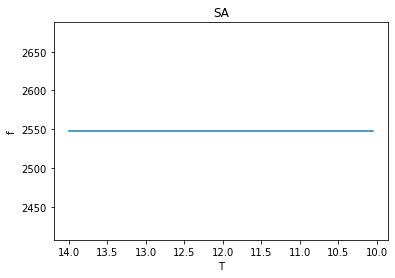

477

: 

In [9]:
# x=100000, y=0.44880933129114925, F=2547.6755617509302
thread_pool_init()
sa = SA(func, x_range=[87000, 100000], y_range=[0.4, 0.5], Tf=10, sx=100000, sy=0.44880933129114925)
sa.run_random_climb()
sa.display()
tot

thread_pool_init done
Temp now: 14 F=2545.683530566852, tot=1, x=90000, y=0.4
NO WAY! last=2545.683530566852, new_results=[2535.5376059090986, 1686.7617227476835, 1130.3945532704138, 2039.4035717585314, 2045.5797824638157, 2410.549953101551, 2348.466493536, 2432.9092219896374, 2383.081446140388, 2396.4049630718573, 2540.2330322428966, 2387.5684233074717, 2369.093718310368, 2222.310211439363]
Temp now: 13.86 F=2545.683530566852, tot=15, x=90000, y=0.4
Temp now: 13.7214 F=2546.8464174201863, tot=29, x=100000, y=0.4618806966650133
NO WAY! last=2546.8464174201863, new_results=[2546.8464174201863, 1809.749240884869, 5.8109366566294876, 1917.916951534517, 2284.618126290053, 2133.63745412208, 2028.5232455010514, 2308.3932778714175, 2401.5706410020703, 2022.8990792069749, 1929.0545009971192, 2317.7631183842072, 2289.274535952228, 2488.78675689538]
Temp now: 13.584185999999999 F=2546.8464174201863, tot=43, x=100000, y=0.4618806966650133
NO WAY! last=2546.8464174201863, new_results=[2546.8464174

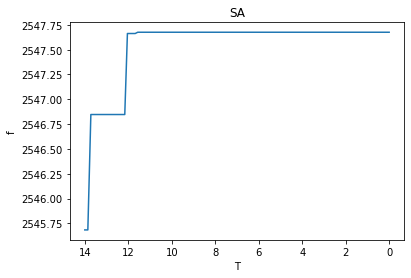

10095

In [7]:
thread_pool_init()
sa = SA(func, x_range=[100, 100000], y_range=[0.1, 0.9], Tf=1e-2, sx=90000, sy=0.4)
sa.run_random_climb()
sa.display()
tot